# Massive list of standardized time series examples

Many free online time series data sets are avaible for benchmarking time series models. Here is some useful information and examples

## Some free time series data sets for benchmarking

### [Rob Hyndman’s Time Series Data Library](https://datamarket.com/data/list/?q=provider:tsdl)

Rob Hyndman’s Time Series Data Library contains over **800 time series** organized by subject as well as pointers to other sources of time series available on the Internet.  The data is freely available for anyone to use and the data can be used by any researcher without further permission by [IFF](https://forecasters.org/). 

### [UCI Machine Learning Repository - Time Series](https://archive.ics.uci.edu/ml/datasets.html?format=&task=&att=&area=&numAtt=&numIns=&type=ts&sort=nameUp&view=table)

UCI currently maintain 437 data sets (**82 time series data sets**) as a service to the machine learning community. It is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. The archive was created as an ftp archive in 1987 by David Aha and fellow graduate students at UC Irvine.

### [Economic Research at the St. Louis Fed](https://fred.stlouisfed.org/tags/series)

Economic Research at the St. Louis Fed allows researchers to download, graph, and track **508,000 US and international time series from 86 sources.**

### [The CNTS Data Archive](https://www.cntsdata.com/the-data)

The Cross-National Time-Series Data Archive is a data set comprised of more than 200 years of annual data from 1815 onward for over 200 countries.

### [Data World](https://data.world/datasets/time-series)

There are 32 time series datasets available on data.world

### [Lynx data](https://www.encyclopediaofmath.org/index.php/Canadian_lynx_data)

## M4 competition

### Intro

The [M4-Competition](https://www.m4.unic.ac.cy/about/) is the continuation of three previous ones organized by Spyros Makridakis (known as the Makridakis or M-Competitions) whose purpose is to identify the most accurate forecasting method(s) for different types of predictions. The M4 consists of **100,000 time series** of Yearly, Quarterly, Monthly and Other (Weekly, Daily and Hourly) data. The minimum number of observations is **13 for yearly, 16 for quarterly, 42 for monthly, 80 for weekly, 93 for daily and 700 for hourly series**. The 100,000 time series of the dataset come mainly from the Economic, Finance, Demographics and Industry areas, while also including data from Tourism, Trade, Labor and Wage, Real Estate, Transportation, Natural Resources and the Environment. 

### Data

Below is the number of time series based on their frequency and type:

| Frequency | Demographic | Finance | Industry | Macro | Micro | Other | Total |
|-----------|-------------|---------|----------|-------|-------|-------|-------|
|  Yearly   |1,088        |6,519    |3,716     |3,903  |6,538  |1,236  |23,000 |
|Quarterly	|1,858	      |5,305    |4,637     |5,315  |6,020  |865    |24,000 |
|Monthly	|5,728	      |10,987	|10,017	   |10,016 |10,975 |277	   |48,000 |
|Weekly	    |24	          |164	    |6	       |41	   |112	   |12	   |359    |
|Daily	    |10	          |1,559	|422	   |127	   |1,476  |633	   |4,227  |
|Hourly	    |0	          |0	    |0	       |0	   |0	   |414	   |414    |
|Total	    |8,708	      |24,534	|18,798	   |19,402 |25,121 |3,437  |100,000|

The data set is available [here](https://www.m4.unic.ac.cy/wp-content/uploads/2017/12/M4DataSet.zip)

### Performance measure

* Mean Absolute Scaled Error

$$\text{MASE} = \frac{1}{h} \frac{\sum_{t=1}^h |Y_t - \hat{Y}_t|}{\frac{1}{n-m} \sum_{t=m+1}^n |Y_t - \hat{Y}_{t-m}| }$$

* symmetric Mean Absolute Percentage Error

Where $Y_t$
is the post sample value of the time series at point $t$, $\hat{Y}_t$ is the estimated forecast, $h$ is the
forecasting horizon and $m$ is the frequency of the data (i.e., 12 for monthly series). Details can be found [here](https://www.m4.unic.ac.cy/wp-content/uploads/2018/03/M4-Competitors-Guide.pdf)

$$\text{sMAPE} = \frac{1}{h} \sum\limits_{t=1}^{h} \frac{2|Y_t - \hat{Y}_t|}{|Y_t| + |\hat{Y}_t|}$$

### Import useful packages

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

### Data

After download and unzip data, put the folder 'M4DataSet' in working directory

In [149]:
hourly_data = pd.read_csv("./M4DataSet/Hourly-train.csv",header = 0,index_col=0).T
daily_data = pd.read_csv("./M4DataSet/Daily-train.csv",header = 0,index_col=0).T
weekly_data = pd.read_csv("./M4DataSet/Weekly-train.csv",header = 0,index_col=0).T
monthly_data = pd.read_csv("./M4DataSet/Monthly-train.csv",header = 0,index_col=0).T
quarterly_data = pd.read_csv("./M4DataSet/Quarterly-train.csv",header = 0,index_col=0).T
yearly_data = pd.read_csv("./M4DataSet/Yearly-train.csv",header = 0,index_col=0).T
hourly_data.iloc[0:10,0:10]

V1,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10
V2,605.0,3124.0,1828.0,6454.0,4263.0,5780.0,52817.0,32479.0,39455.0,513.0
V3,586.0,2990.0,1806.0,6324.0,4297.0,5497.0,51773.0,31018.0,38279.0,512.0
V4,586.0,2862.0,1897.0,6075.0,4236.0,5306.0,50907.0,30033.0,36944.0,506.0
V5,559.0,2809.0,1750.0,5949.0,4080.0,5178.0,50224.0,27716.0,35984.0,500.0
V6,511.0,2544.0,1679.0,5858.0,3883.0,5235.0,49496.0,25067.0,33721.0,490.0
V7,443.0,2201.0,1620.0,5579.0,3672.0,5382.0,48816.0,22946.0,31113.0,484.0
V8,422.0,1996.0,1463.0,5163.0,3248.0,5723.0,46514.0,21396.0,28985.0,467.0
V9,395.0,1861.0,1342.0,4790.0,2841.0,6115.0,42432.0,20628.0,27498.0,446.0
V10,382.0,1735.0,1192.0,4478.0,2513.0,6435.0,38210.0,20103.0,26384.0,434.0
V11,370.0,1713.0,1108.0,4227.0,2275.0,6718.0,35171.0,19932.0,25663.0,422.0


For demonstration purpose, only hourly data is showed. One can use the following code to see visualization of individual time series

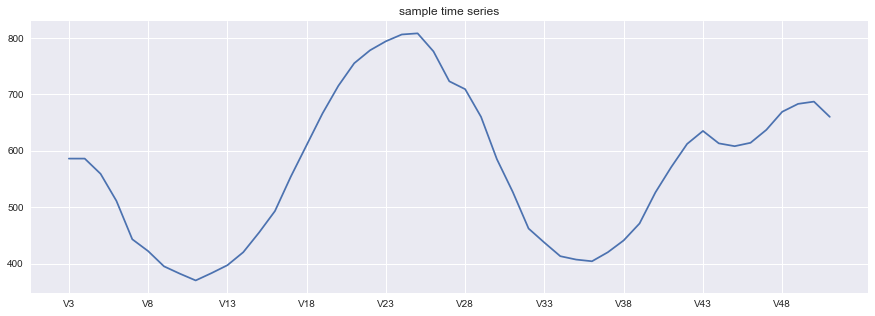

In [150]:
sns.set()
data = hourly_data.iloc[1:50,0].dropna()
plt.figure(figsize=(15,5))
plt.plot(data)
plt.xticks(np.arange(0, 50, 5))
plt.title("sample time series")
plt.show()

### Evaluate model by MASE, sMAPE and MAE

In [166]:
def sMAPE(ser_true, ser_est, h):
    return 1/h * np.sum(2 * abs(ser_true - ser_est)/(abs(ser_true) + abs(ser_est)))

def MASE(ser_true, ser_est, freq, h, data_train):
    n = data_train.shape[1]
    if h >= n:
        return 0
    num = np.sum(abs(ser_true - ser_est))
    den = 1 / (n - freq) * np.sum(abs(data_train[0][freq:n] - data_train[0][0:n - freq]))
    if den == 0:
        return 0
    else:
        return 1 / h * num / den
    
def MAE(ser_true, ser_est):
    return np.mean(abs(ser_true-ser_est))

def Eva1(data, prediction, freq, h=6):
    '''
    data: last h data in each time series is testing, remaining part is training
    data_type: pandas dataframe
    prediction: function that makes prediction, take values data_train,h,freq
    prediction_type: function
    freq: frequency of the data (i.e., 12 for monthly series)
    freq_type: 
    h: forecasting horizon
    '''
    
    sMAPE_final = 0
    MASE_final = 0
    MAE_final = 0
    MAE_curve_final = np.zeros((1,h))
    p = data.shape[1]
    
    for i in range(p):
        temp_data = data.iloc[:,i]
        n = sum(temp_data.notnull())
        data_train = np.array(temp_data.iloc[0:n-h]).reshape((1,n-h))
        data_test = np.array(temp_data.iloc[n-h:n]).reshape((1,h))
        estimation = prediction(data_train,h,freq)
        #estimation = np.ones((1,h))*data_train[0,-1]
        sMAPE_val = sMAPE(data_test, estimation, h)
        MASE_val = MASE(data_test, estimation, freq, h, data_train)
        MAE_val = MAE(data_test, estimation)
        MAE_curve_val = abs(data_test - estimation)    
            
        sMAPE_final += sMAPE_val
        MASE_final += MASE_val
        MAE_final += MAE_val
        MAE_curve_final += MAE_curve_val
    
    return {'sMAPE':sMAPE_final/p, 'MASE':MASE_final/p, 'MAE':MAE_final/p, 'MAE_curve':MAE_curve_final/p}

def Eval_all_data(datasets, prediction, freq_seq, h):
    sMAPE_all = 0
    MASE_all = 0
    MAE_all = 0
    MAE_curve_all = np.zeros((1,h))
    
    sets = len(datasets)
    for i in range(sets):
        output = Eva1(datasets[i], prediction, freq_seq[i], h)
        sMAPE_all += output['sMAPE']
        MASE_all += output['MASE']
        MAE_all += output['MAE']
        MAE_curve_all = MAE_curve_all + output['MAE_curve']
    return {'sMAPE':sMAPE_all/sets, 'MASE':MASE_all/sets, 'MAE':MAE_all/sets, 'MAE_curve':MAE_curve_all/sets}

# print(Eval_all_data(datasets = [hourly_data,daily_data,weekly_data,monthly_data,quarterly_data,yearly_data],
#                     prediction = 2, freq_seq = [24,7,4,12,4,1], h=10))

Now let's try some different models by first define some environmental parameters:
* datasets is list of data sets used in prediction
* freq_seq is list of frequencies for each data set
* h is forecasting horizon

In [220]:
datasets = [hourly_data,daily_data,weekly_data,monthly_data,quarterly_data,yearly_data]
freq_seq = [24,7,4,12,4,1]
h=6

### Baseline model

Predictions are fixed at the last trining observation. Also know as [Naïve 1](https://www.m4.unic.ac.cy/wp-content/uploads/2018/03/M4-Competitors-Guide.pdf)

In [209]:
def naive1(data_train,h,freq):
    return np.ones((1,h))*data_train[0,-1]

result = Eval_all_data(datasets = datasets, prediction = naive1, freq_seq = freq_seq, h=h)

The accuracy measures for baseline model is presented below

In [210]:
n1_sMAPE = result['sMAPE']; print('sMAPE = ', n1_sMAPE)
n1_MASE = result['MASE']; print('MASE = ', n1_MASE)
n1_MAE = result['MAE']; print('MAE = ', n1_MAE)

sMAPE =  0.14375191186495398
MASE =  3.5628978696315663
MAE =  507.82714480846863


The MAE curve for baseline model is given as the following

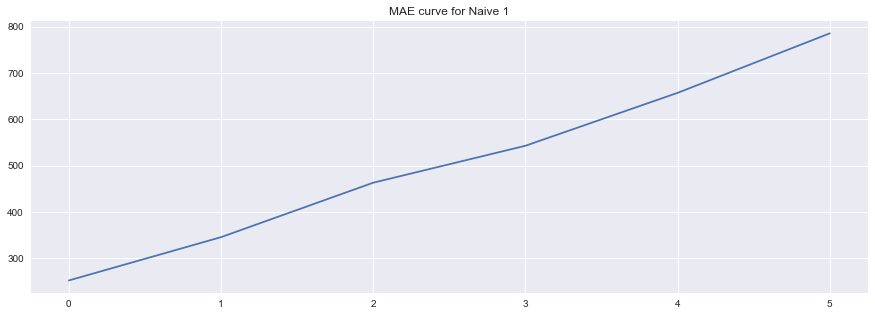

In [211]:
data = result['MAE_curve'][0]
plt.figure(figsize=(15,5))
plt.plot(data)
plt.title("MAE curve for Naive 1")
plt.show()

For a randomly selected time series, the true value vs prediction is showed below

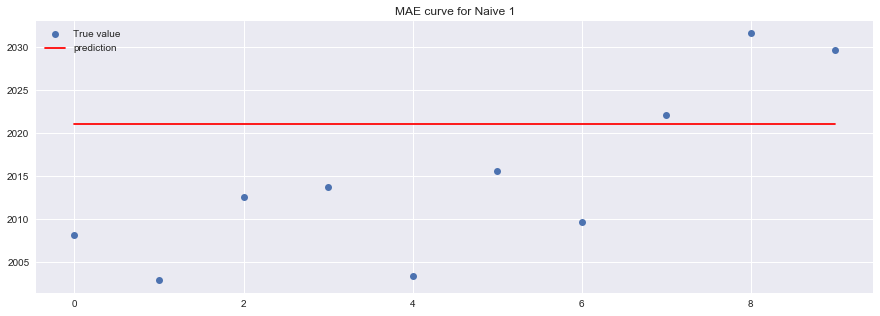

In [207]:
temp_data = daily_data.iloc[:,0]
n = sum(temp_data.notnull())
temp_true = np.array(temp_data.iloc[n-h:n])
temp_prediction = np.ones((h))*temp_data.iloc[n-h-1]

plt.figure(figsize=(15,5))
plt.plot(temp_true,'o')
plt.plot(temp_prediction, 'red')
plt.legend(('True value', 'prediction'), loc='upper left')
plt.title("MAE curve for Naive 1")
plt.show()

### Baseline Seasonal model

Forecasts are equal to the last known observation of the same period. Equivalent to [Seasonal Naïve](https://www.m4.unic.ac.cy/wp-content/uploads/2018/03/M4-Competitors-Guide.pdf)

In [223]:
def baseline_seasonal(data_train,h,freq):
    output = data_train[0,-freq:-freq+h]
    if len(output) < h:
        return np.ones((1,h))*data_train[0,-1]
    else:
        return output

result = Eval_all_data(datasets = datasets, prediction = baseline_seasonal, freq_seq = freq_seq, h=h)

The accuracy measures for baseline seasonal model is presented below

In [224]:
bs_sMAPE = result['sMAPE']; print('sMAPE = ', bs_sMAPE)
bs_MASE = result['MASE']; print('MASE = ', bs_MASE)
bs_MAE = result['MAE']; print('MAE = ', bs_MAE)

sMAPE =  0.11497247540243712
MASE =  1.728976056731175
MAE =  467.7452930477663


The MAE curve for baseline model is given as the following

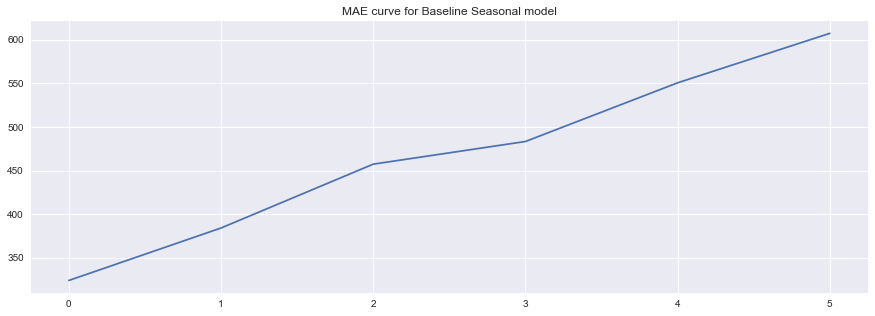

In [225]:
data = result['MAE_curve'][0]
plt.figure(figsize=(15,5))
plt.plot(data)
plt.title("MAE curve for Baseline Seasonal model")
plt.show()

For a randomly selected time series, the true value vs prediction is showed below

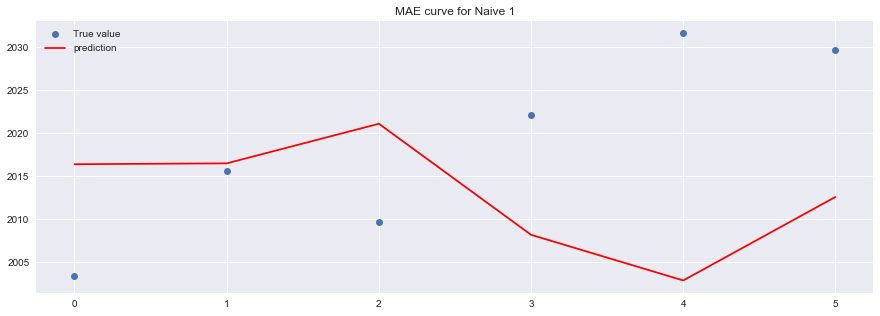

In [226]:
temp_data = daily_data.iloc[:,0]
n = sum(temp_data.notnull())
temp_true = np.array(temp_data.iloc[n-h:n])
temp_train = np.array(temp_data.iloc[0:n-h]).reshape((1,n-h))
temp_prediction = baseline_seasonal(temp_train,h,7)

plt.figure(figsize=(15,5))
plt.plot(temp_true,'o')
plt.plot(temp_prediction, 'red')
plt.legend(('True value', 'prediction'), loc='upper left')
plt.title("MAE curve for Naive 1")
plt.show()

In [253]:
# def arima(data_train,h,freq):
#     n = data_train.shape[1]
#     mod = ARIMA(data_train[0], order=(1,0,1))
#     results = mod.fit()
#     output = results.predict(start=n+1, end=n+h-1)
    
# #     with warnings.catch_warnings():
# #         warnings.simplefilter("ignore")
# #         mod = SARIMAX(data_train[0], trend='n', order=(1,0,0), 
# #                   seasonal_order=(1,1,0,freq), enforce_stationarity=False)
# #         results = mod.fit()
# #         output = results.predict(start=n+1, end=n+h)
#     return output
# result = Eval_all_data(datasets = datasets, prediction = arima, freq_seq = freq_seq, h=h)

## Some nonfree resourses

### [Autobox](http://autobox.com/cms/index.php/home)